# Problem statement 

## The goal is to understand the relationship between house features and how these variables affect the house price.

#### Using more than one model, predict the price of the house using the given dataset. Please compare the accuracy of the models along with the drawbacks of each technique's assumptions before recommending the final prediction model.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster

In [2]:
pd.options.display.max_columns=300
pd.options.display.max_rows=300

In [3]:
# Import the dataset
data = pd.read_excel('DS - Assignment Part 1 data set.xlsx')
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
#Shape of the data
data.shape

(414, 9)

In [5]:
#Metadata
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


- No missing data found
- 414 records and 9 features

In [6]:
#Fixing column Names
data.columns=data.columns.str.strip().str.replace(' ','_').str.replace('(','').str.replace(')','')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Transaction_date                        414 non-null    float64
 1   House_Age                               414 non-null    float64
 2   Distance_from_nearest_Metro_station_km  414 non-null    float64
 3   Number_of_convenience_stores            414 non-null    int64  
 4   latitude                                414 non-null    float64
 5   longitude                               414 non-null    float64
 6   Number_of_bedrooms                      414 non-null    int64  
 7   House_size_sqft                         414 non-null    int64  
 8   House_price_of_unit_area                414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [8]:
data.duplicated().sum() #No duplicate records

0

In [9]:
## Statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_date,414.0,2013.148953,0.281995,2012.666667,2012.916667,2013.166667,2013.416667,2013.583333
House_Age,414.0,17.712560,11.392485,0.000000,9.025000,16.100000,28.150000,43.800000
Distance_from_nearest_Metro_station_km,414.0,1083.885689,1262.109595,23.382840,289.324800,492.231300,1454.279000,6488.021000
Number_of_convenience_stores,414.0,4.094203,2.945562,0.000000,1.000000,4.000000,6.000000,10.000000
latitude,414.0,24.969030,0.012410,24.932070,24.963000,24.971100,24.977455,25.014590
longitude,414.0,121.533361,0.015347,121.473530,121.528085,121.538630,121.543305,121.566270
Number_of_bedrooms,414.0,1.987923,0.818875,1.000000,1.000000,2.000000,3.000000,3.000000
House_size_sqft,414.0,931.475845,348.910269,402.000000,548.000000,975.000000,1234.750000,1500.000000
House_price_of_unit_area,414.0,37.980193,13.606488,7.600000,27.700000,38.450000,46.600000,117.500000


In [10]:
df=data.copy()

In [11]:
df.columns

Index(['Transaction_date', 'House_Age',
       'Distance_from_nearest_Metro_station_km',
       'Number_of_convenience_stores', 'latitude', 'longitude',
       'Number_of_bedrooms', 'House_size_sqft', 'House_price_of_unit_area'],
      dtype='object')

In [12]:
## Univariate Analysis - Continuous Variables
cont=['House_Age','Distance_from_nearest_Metro_station_km','House_size_sqft', 'House_price_of_unit_area']

Variable: House_Age --> Skewness:  0.38 , Kurtosis : -0.88


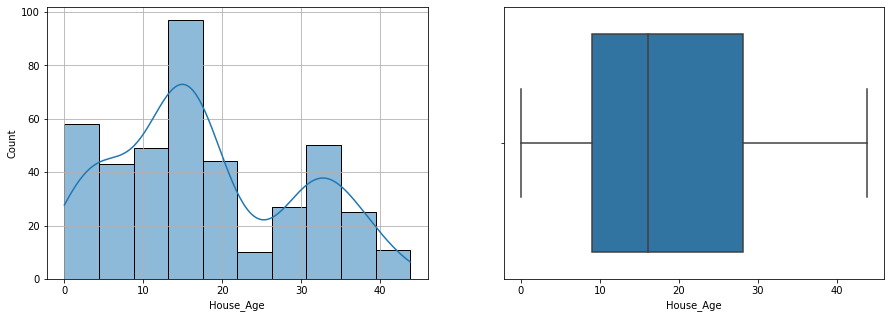

Variable: Distance_from_nearest_Metro_station_km --> Skewness:  1.89 , Kurtosis : 3.21


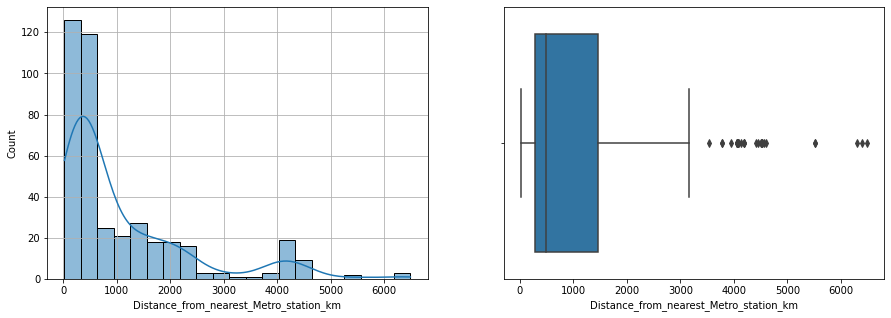

Variable: House_size_sqft --> Skewness:  -0.11 , Kurtosis : -1.42


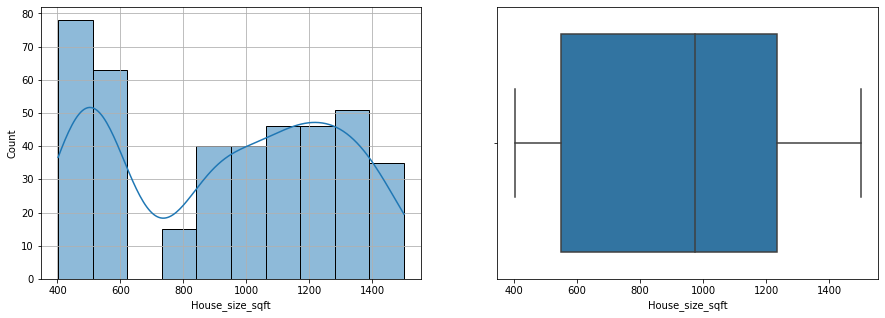

Variable: House_price_of_unit_area --> Skewness:  0.6 , Kurtosis : 2.18


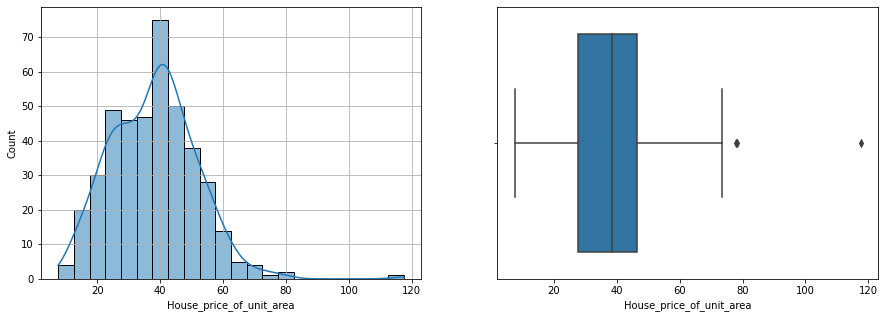

In [109]:
for col in cont:
    print('Variable:',col,'--> Skewness: ',round(df[col].skew(),2),', Kurtosis :',round(df[col].kurtosis(),2))
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(x=df[col], kde=True)
    plt.grid()
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

In [32]:
# pd.DatetimeIndex(df['Transaction_date']) ## Doesn't make sense

In [14]:
## Assuming the transaction dates to be only the year 
df['Transaction_date']=np.trunc(df['Transaction_date'])
df.Transaction_date

0      2012.0
1      2012.0
2      2013.0
3      2013.0
4      2012.0
        ...  
409    2013.0
410    2012.0
411    2013.0
412    2013.0
413    2013.0
Name: Transaction_date, Length: 414, dtype: float64

In [15]:
discrete=['Transaction_date','Number_of_convenience_stores', 'Number_of_bedrooms']

Feature:  TRANSACTION_DATE
2013.0    288
2012.0    126
Name: Transaction_date, dtype: int64

Skewness of the variable Transaction_date : -0.85


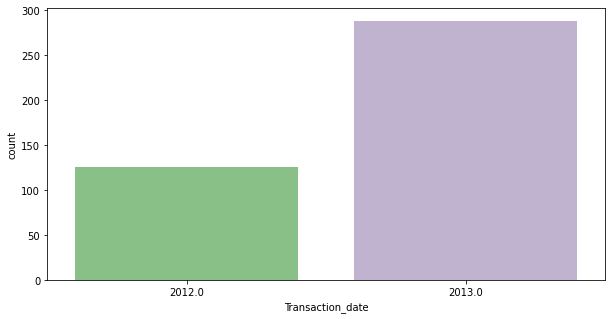

Feature:  NUMBER_OF_CONVENIENCE_STORES
5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: Number_of_convenience_stores, dtype: int64

Skewness of the variable Number_of_convenience_stores : 0.15


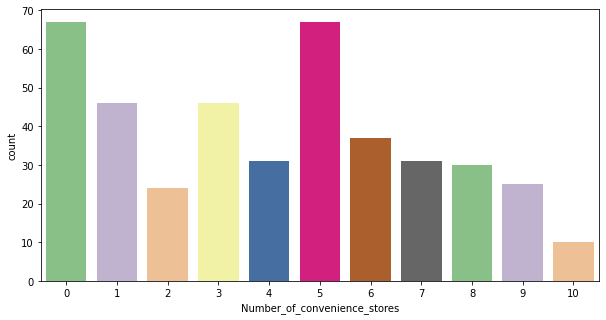

Feature:  NUMBER_OF_BEDROOMS
1    141
2    137
3    136
Name: Number_of_bedrooms, dtype: int64

Skewness of the variable Number_of_bedrooms : 0.02


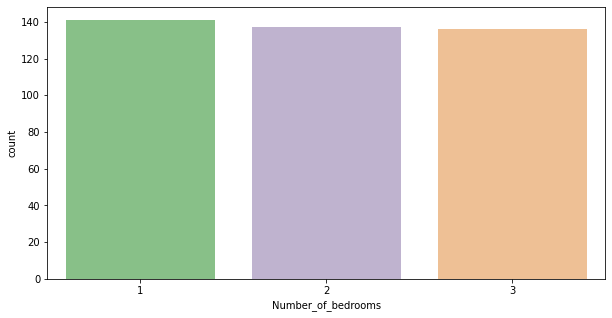

In [17]:
for col in discrete:
    print('Feature: ',col.upper())
    print(df[col].value_counts())
    print()
    
    print('Skewness of the variable',col,':',round(df[col].skew(),2))
    plt.figure(figsize=(10,5))
    sns.countplot(x=col,data=df,palette='Accent')
       
    
    plt.show()

In [18]:
## Bi/Multivariate
df1=df[['Transaction_date', 'House_Age','Distance_from_nearest_Metro_station_km',\
                 'Number_of_convenience_stores', 'Number_of_bedrooms', 'House_size_sqft', 'House_price_of_unit_area']]

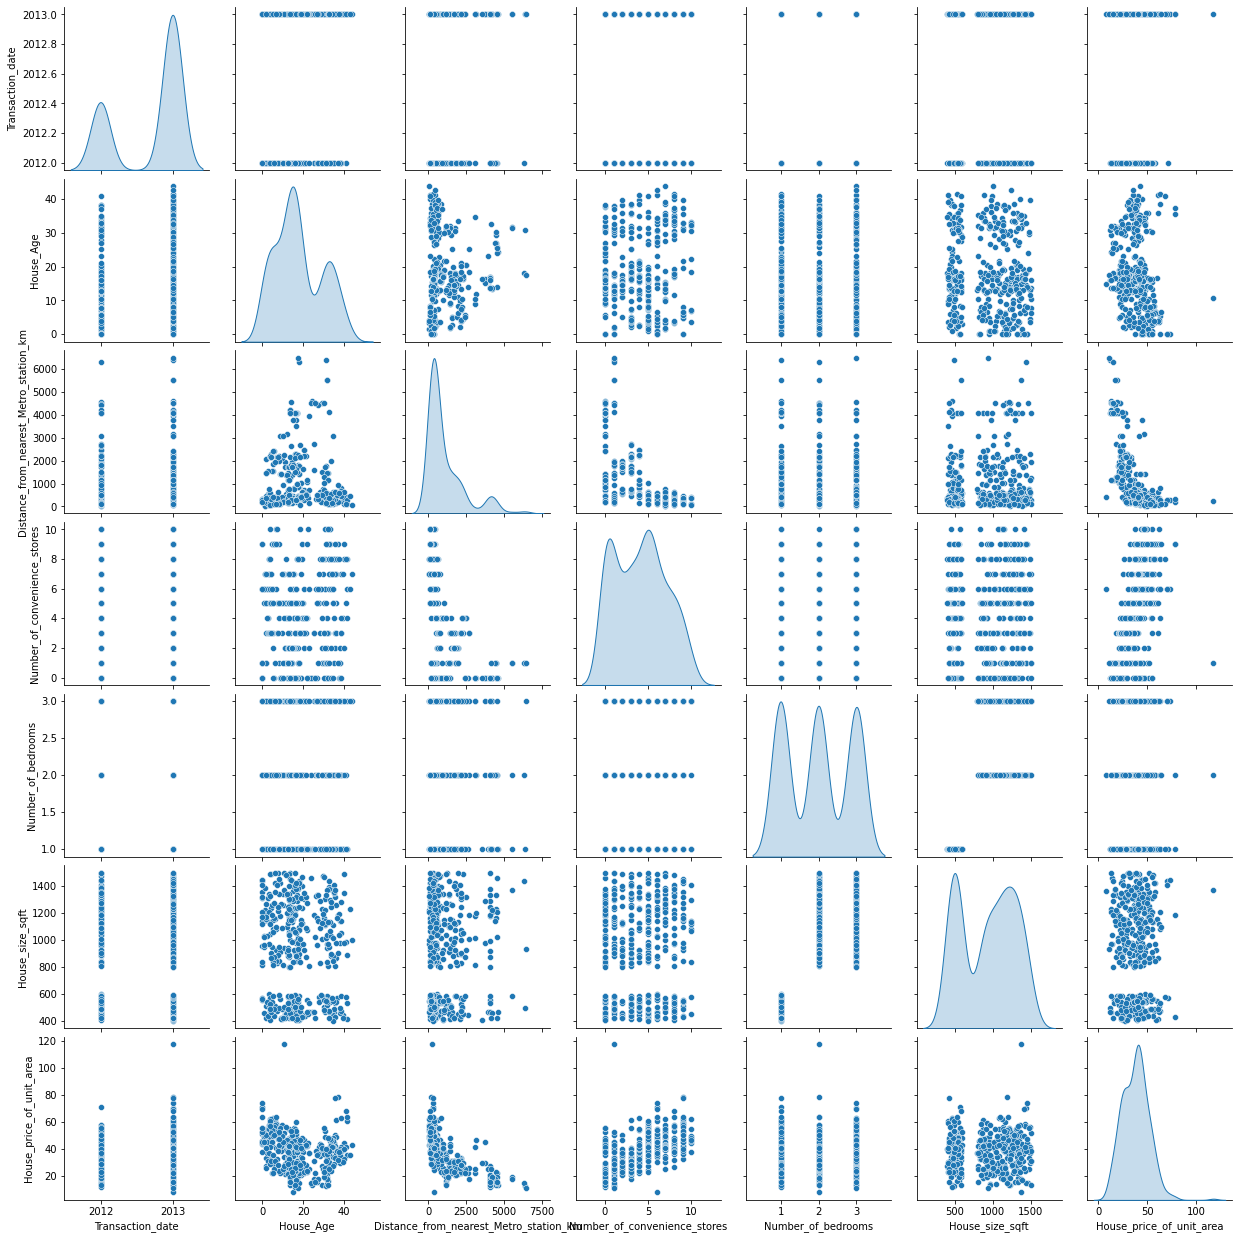

In [57]:
sns.pairplot(df1,diag_kind='kde');

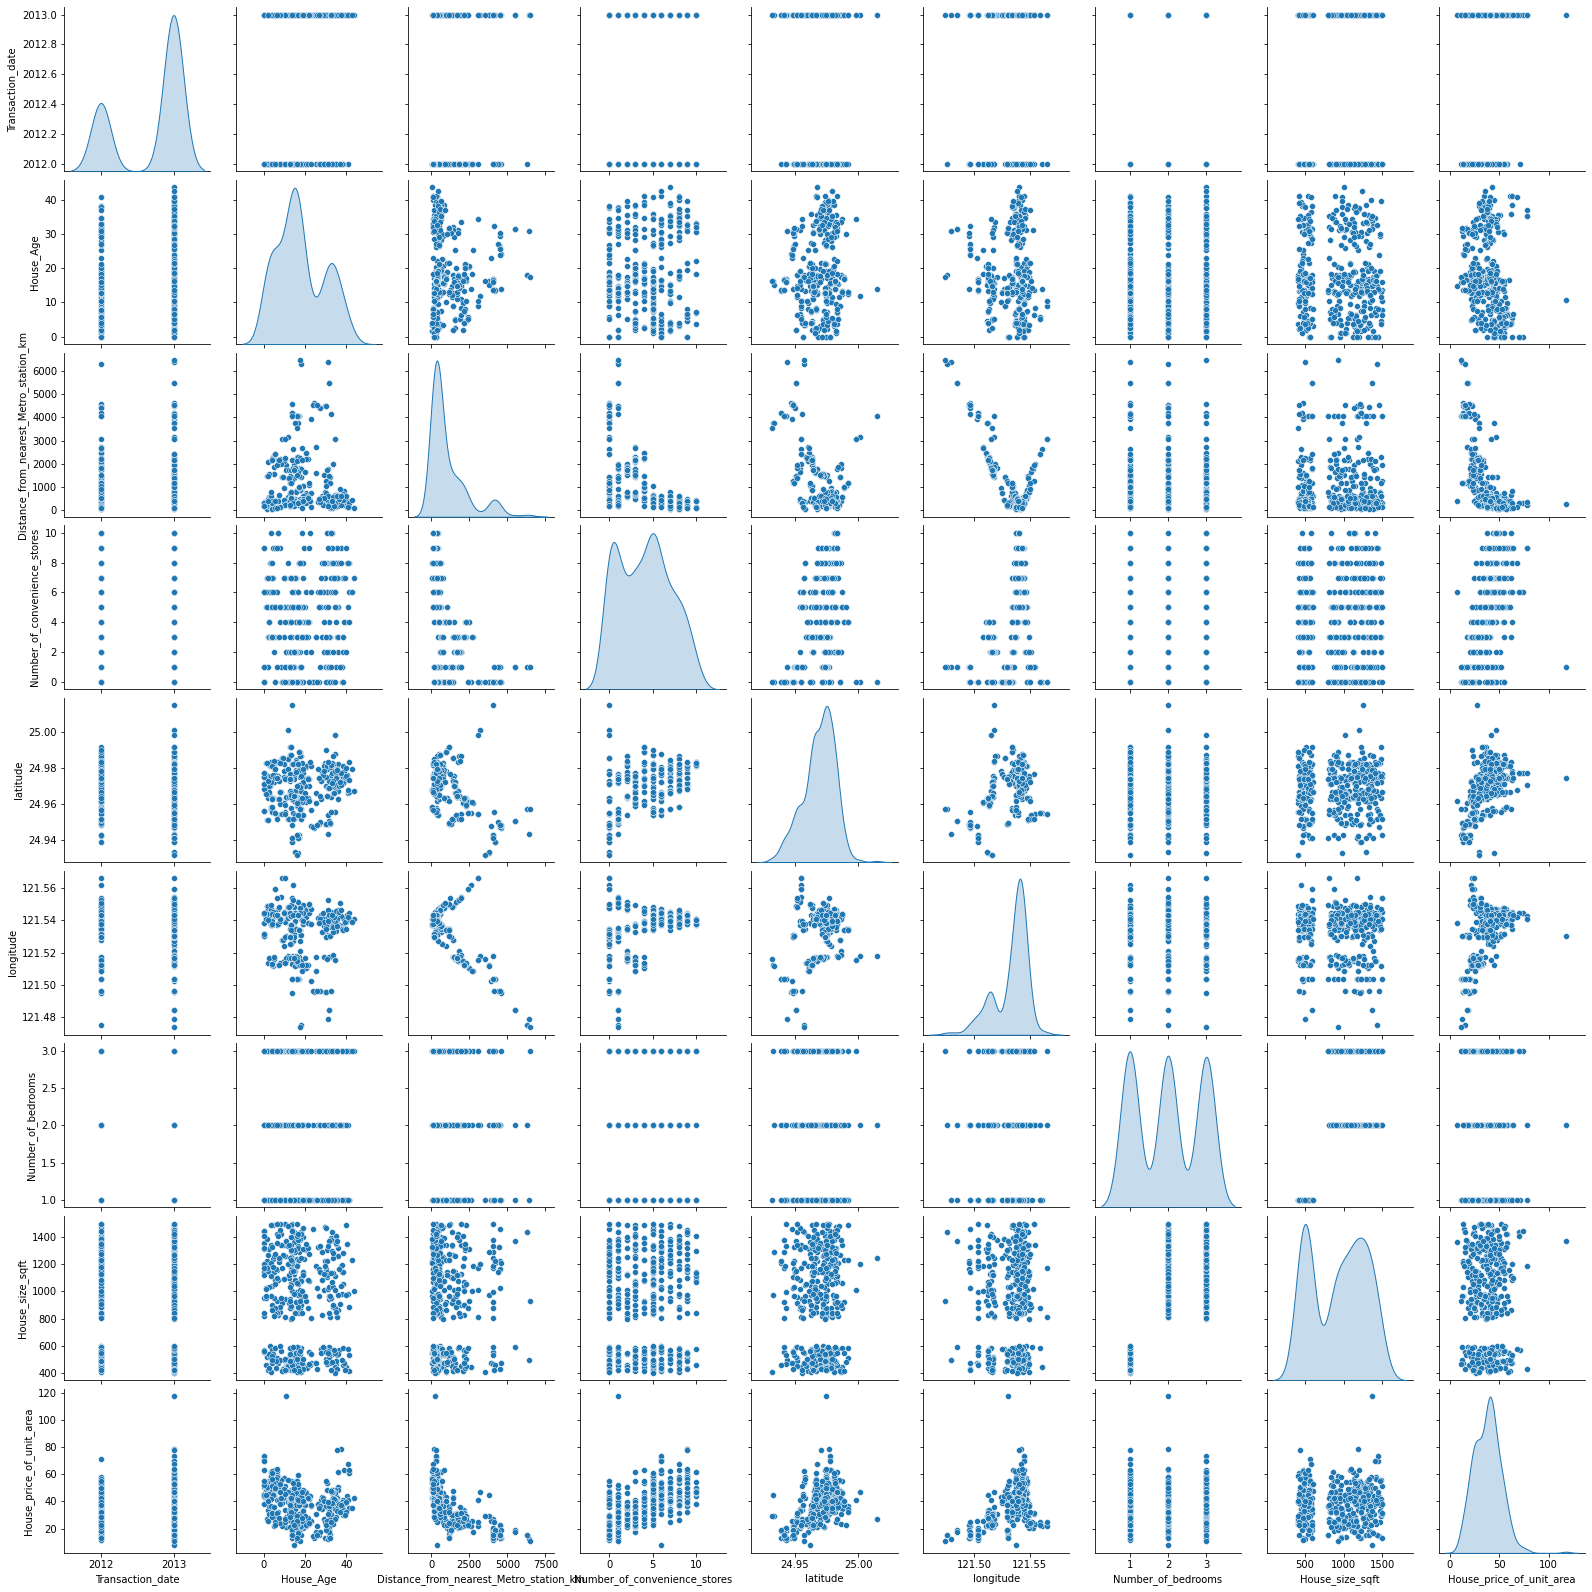

In [63]:
sns.pairplot(df,diag_kind='kde');

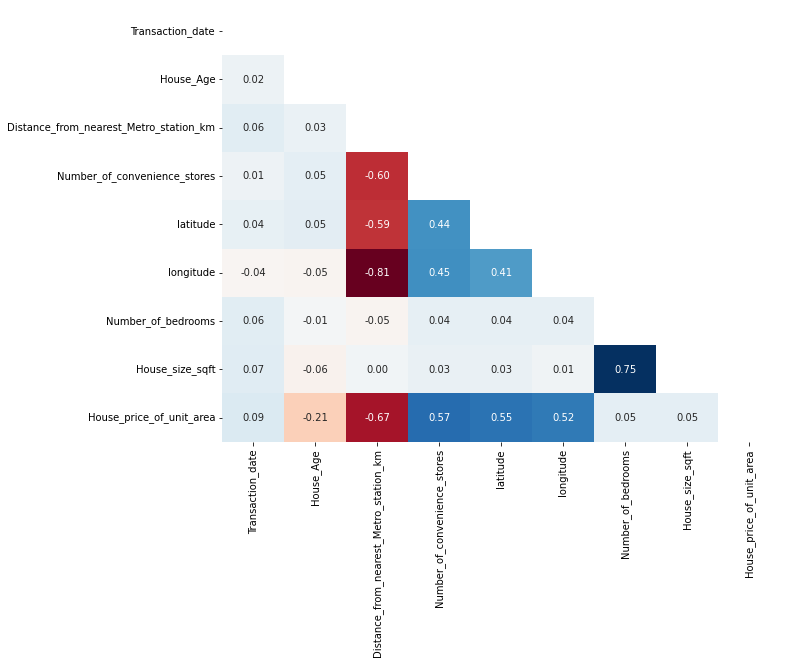

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='RdBu',\
            mask=np.triu(np.ones_like(round(data.corr(),2),dtype=np.bool)),cbar=False)
plt.show()

- House price per unit area is inversely((moderate) correlated to distance from the nearest metro station. 
- House price per unit area is positively(moderate) correlated to number of convenience stores. The same applies to lattitude & longitude


In [19]:
lat = data.latitude
long = data.longitude
locations = zip(lat,long)

somemap = folium.Map(location=[lat.mean(), long.mean()], zoom_start=10,tiles='cartodb positron')
FastMarkerCluster(locations).add_to(somemap)
somemap

In [75]:
df.groupby(['latitude','longitude']).describe()[['House_Age']]

House_Age                                             \
                       count       mean        std   min     25%    50%   
latitude longitude                                                        
24.93207 121.51597       1.0  16.300000        NaN  16.3  16.300  16.30   
24.93293 121.51203       1.0  16.400000        NaN  16.4  16.400  16.40   
24.93363 121.51158       1.0  15.200000        NaN  15.2  15.200  15.20   
24.93885 121.50383       3.0  13.566667   0.057735  13.5  13.550  13.60   
24.94155 121.50381       7.0  15.014286   1.615992  13.6  13.750  13.80   
24.94235 121.50357       1.0  16.200000        NaN  16.2  16.200  16.20   
24.94297 121.50342       6.0  16.500000   0.414729  16.0  16.150  16.55   
24.94375 121.47883       1.0  30.900000        NaN  30.9  30.900  30.90   
24.94684 121.49578       1.0  24.200000        NaN  24.2  24.200  24.20   
24.94741 121.49628       1.0  24.000000        NaN  24.0  24.000  24.00   
24.94783 121.50243       1.0  23.000000        NaN  23.0  23.000  23.00   
24.94826 121.49587       2.0  25.750000   0.212132  25.6  25.675  25.75   
24.94867 121.49507       1.0  13.900000        NaN  13.9  13.900  13.90   
24.94883 121.52954       2.0  30.500000   0.282843  30.3  30.400  30.50   
24.94890 121.53095       1.0  31.000000        NaN  31.0  31.000  31.00   
24.94898 121.49621       1.0  26.900000        NaN  26.9  26.900  26.90   
24.94920 121.53076       1.0  31.900000        NaN  31.9  31.900  31.90   
24.94925 121.49542       2.0  29.850000   0.636396  29.4  29.625  29.85   
24.94935 121.53046       1.0  32.000000        NaN  32.0  32.000  32.00   
24.94960 121.53018       1.0  31.700000        NaN  31.7  31.700  31.70   
24.94968 121.53009       1.0  31.700000        NaN  31.7  31.700  31.70   
24.95032 121.49587       1.0  27.100000        NaN  27.1  27.100  27.10   
24.95095 121.48458       2.0  31.600000   0.141421  31.5  31.550  31.60   
24.95120 121.54900       2.0   1.900000   0.141421   1.8   1.850   1.90   
24.95153 121.55254       1.0  14.200000        NaN  14.2  14.200  14.20   
24.95155 121.55387       1.0   6.200000        NaN   6.2   6.200   6.20   
24.95182 121.54887       2.0  18.000000   0.000000  18.0  18.000  18.00   
24.95204 121.54842       8.0  12.350000   0.981253  11.5  11.975  12.10   
24.95394 121.55174       1.0  16.400000        NaN  16.4  16.400  16.40   
24.95402 121.55282       1.0  31.300000        NaN  31.3  31.300  31.30   
24.95418 121.53713       1.0   6.500000        NaN   6.5   6.500   6.50   
24.95425 121.53990       3.0  17.833333   2.281082  15.2  17.150  19.10   
24.95460 121.56627       1.0  10.300000        NaN  10.3  10.300  10.30   
24.95464 121.56627       1.0   8.900000        NaN   8.9   8.900   8.90   
24.95468 121.55481       1.0   8.400000        NaN   8.4   8.400   8.40   
24.95495 121.56174       1.0  14.100000        NaN  14.1  14.100  14.10   
24.95505 121.55964       2.0   5.400000   0.282843   5.2   5.300   5.40   
24.95544 121.49630       1.0  32.600000        NaN  32.6  32.600  32.60   
24.95562 121.53872       1.0  34.600000        NaN  34.6  34.600  34.60   
24.95591 121.53956       1.0   4.100000        NaN   4.1   4.100   4.10   
24.95593 121.53913       1.0  10.400000        NaN  10.4  10.400  10.40   
24.95618 121.53844       2.0   0.000000   0.000000   0.0   0.000   0.00   
24.95663 121.53765       1.0  23.000000        NaN  23.0  23.000  23.00   
24.95674 121.53400       1.0  17.500000        NaN  17.5  17.500  17.50   
24.95719 121.47353       1.0  17.400000        NaN  17.4  17.400  17.40   
24.95743 121.47516       1.0  18.000000        NaN  18.0  18.000  18.00   
24.95744 121.53711       3.0   3.666667   0.378594   3.4   3.450   3.50   
24.95776 121.53438       1.0  13.300000        NaN  13.3  13.300  13.30   
24.95836 121.53756       2.0   3.700000   0.282843   3.5   3.600   3.70   
24.95885 121.51359       2.0  16.350000   0.212132  16.2  16.275  16.35   
24.95957 121.51353       1.0  10.400000     

In [20]:
df["houseage_range"] = pd.cut(df["House_Age"], 
                     bins=[0, 10,20, 30,40, df["House_Age"].max()], 
                     labels=["0-10", "10-20", "20-30", "30-40",'40+'])

In [21]:
df["metro_dist_range"] = pd.cut(df["Distance_from_nearest_Metro_station_km"], 
                     bins=[0,1000,2000,3000,4000,5000,6000,df["Distance_from_nearest_Metro_station_km"].max()], 
                     labels=["0-1K", "1K-2K", "2K-3K", "3K-4K",'4K-5K','6K-6K','6K+'])

In [22]:
df["sqft_range"] = pd.cut(df["House_size_sqft"], 
                     bins=[400, 500,1000, df["House_size_sqft"].max()], 
                     labels=["<500", "500-1K", "1K+"])

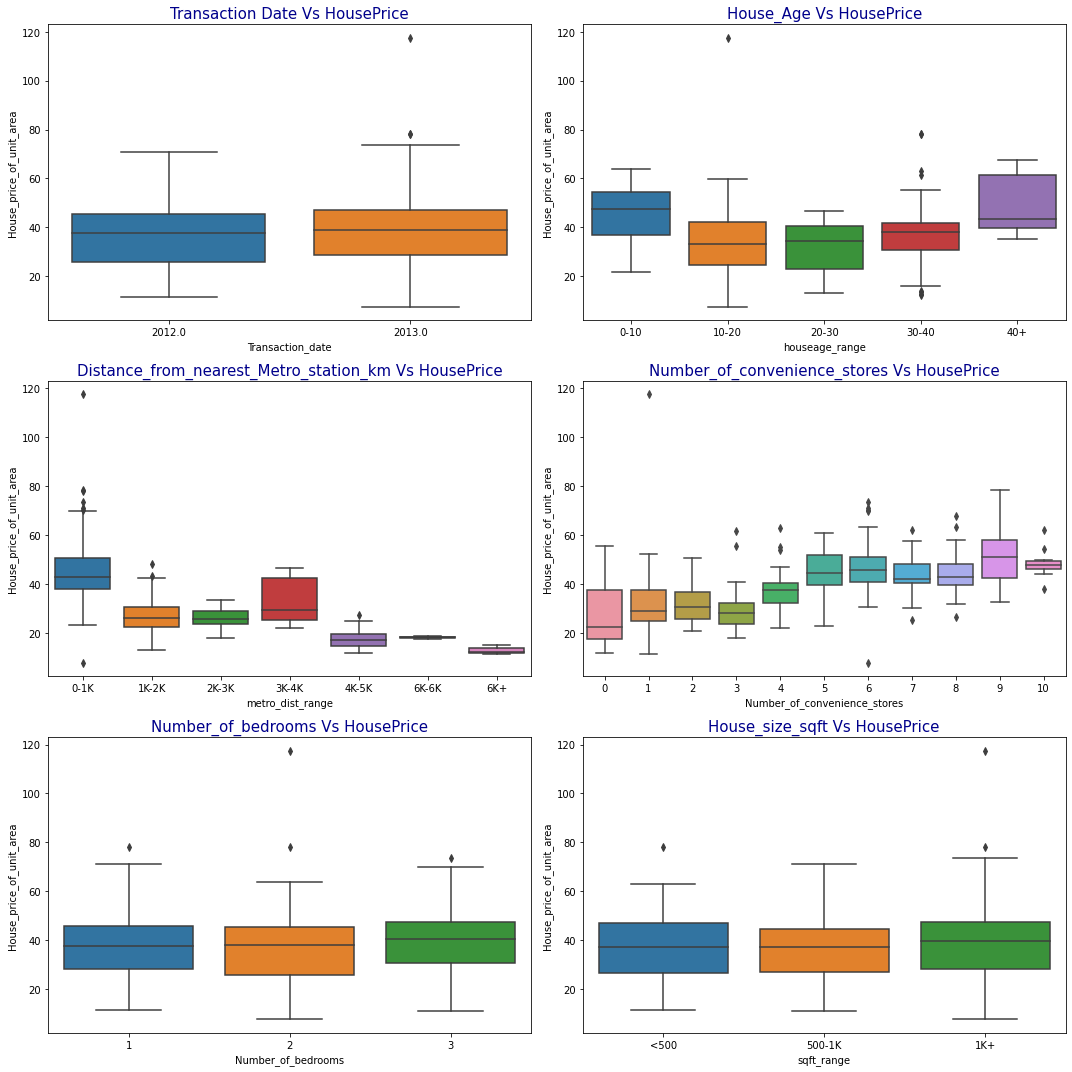

In [23]:
### Predictors vs Target
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.boxplot(x='Transaction_date',y='House_price_of_unit_area',data=df)
plt.title('Transaction Date Vs HousePrice',fontsize=15,color="darkblue")

plt.subplot(3,2,2)
sns.boxplot(x='houseage_range',y='House_price_of_unit_area',data=df)
plt.title('House_Age Vs HousePrice',fontsize=15,color="darkblue")

plt.subplot(3,2,3)
sns.boxplot(x='metro_dist_range',y='House_price_of_unit_area',data=df)
plt.title('Distance_from_nearest_Metro_station_km Vs HousePrice',fontsize=15,color="darkblue")

plt.subplot(3,2,4)
sns.boxplot(x='Number_of_convenience_stores',y='House_price_of_unit_area',data=df)
plt.title('Number_of_convenience_stores Vs HousePrice',fontsize=15,color="darkblue")

plt.subplot(3,2,5)
sns.boxplot(x='Number_of_bedrooms',y='House_price_of_unit_area',data=df)
plt.title('Number_of_bedrooms Vs HousePrice',fontsize=15,color="darkblue")

plt.subplot(3,2,6)
sns.boxplot(x='sqft_range',y='House_price_of_unit_area',data=df)
plt.title('House_size_sqft Vs HousePrice',fontsize=15,color="darkblue")

plt.tight_layout()
plt.show()

- Transaction year does not have much of an impact
- House age in 0-10 yrs and 40+ yrs have higher median house price
- Houses with 1km distance from the metro station have the highest median house price
- House prices are higher for houser having 5 or more convenience stores nearby
- 3 bedroom houses have slightly higher median value
- houses with more than 1000 sqft have slightly higher median house price

In [94]:
# data.drop('Transaction_date',axis=1,inplace=True)

## Model Building

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,KFold
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [25]:
X=data.drop(['Transaction_date','House_price_of_unit_area'],axis=1)
y=data['House_price_of_unit_area']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
print(X_train.shape)

(289, 7)


In [28]:
print(X_test.shape)

(125, 7)


In [29]:
# Scaling 
sc=StandardScaler()
X_train_scaled=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression,  Ridge, Lasso
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score

In [31]:
## Few functions
def calc_vif(X):
    vif=pd.DataFrame()
    vif['Pred_Var'] = X.columns
    vif['VIF']=[variance_inflation_factor(X.values,idx) for idx in range(X.shape[1])]
    return vif

In [32]:
def performance_metrics(X_train,X_test,model):
    '''
    Calculates the performance measures - R2 Score, Adj R2 Score, RMSE & MAPE
    X_train: train data - predictor variables
    X_test: test data - predictor variables
    model: Regressor 
    '''
    scores=[] # Metrics
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    n=X_train.shape[0]
    k=X_train.shape[1]
    
    R2_train = model.score(X_train, y_train)
    train_rmse = round(mean_squared_error(y_train,train_pred,squared=False),2)
    adjR2_train = 1- ((1-R2_train)*(n-1))/(n-k-1)
    train_mape = round(mean_absolute_percentage_error(y_train,train_pred),2)
    
    R2_test = model.score(X_test, y_test)
    n=X_test.shape[0]
    test_rmse = round(mean_squared_error(y_test,test_pred,squared=False),2)
    adjR2_test = 1- ((1-R2_test)*(n-1))/(n-k-1)
    test_mape = round(mean_absolute_percentage_error(y_test,test_pred),2)
    
    
    scores.extend((R2_train,R2_test,
                   adjR2_train,adjR2_test,
                   train_rmse,test_rmse,
                  train_mape,test_mape))
    
    return scores

In [33]:
## Performce DFs
linear_models = pd.DataFrame(index=['R2_Train','R2_Test','AdjR2_Train','AdjR2_Test',\
                                    'RMSE_Train','RMSE_Test','MAPE_Train','MAPE_Test'])
linear_models

""
R2_Train
R2_Test
AdjR2_Train
AdjR2_Test
RMSE_Train
RMSE_Test
MAPE_Train
MAPE_Test


In [34]:
model_performance = pd.DataFrame(index=['R2_Train','R2_Test','AdjR2_Train','AdjR2_Test',\
                                        'RMSE_Train','RMSE_Test','MAPE_Train','MAPE_Test'])
model_performance

""
R2_Train
R2_Test
AdjR2_Train
AdjR2_Test
RMSE_Train
RMSE_Test
MAPE_Train
MAPE_Test


In [35]:
vif=calc_vif(X_train)
vif=vif.sort_values('VIF',ascending=False).reset_index(drop=True)
vif['VIF']=vif['VIF'].map('{:.2f}'.format)

In [46]:
vif

,Pred_Var,VIF
0,latitude,5611353.11
1,longitude,5610367.79
2,House_size_sqft,19.68
3,Number_of_bedrooms,16.76
4,Number_of_convenience_stores,4.85
5,House_Age,3.42
6,Distance_from_nearest_Metro_station_km,2.99


In [36]:
####################################### Basic Model - Using sklearn.LinearRegression ##################################
LR = LinearRegression().fit(X_train_scaled,y_train)
## Coeffiecients and Intercept
LR_coeff = pd.DataFrame()
LR_coeff['Variable']=X_train.columns
LR_coeff['Coef']=np.round(LR.coef_,2)
LR_coeff.loc[len(LR_coeff.index)]=['Intercept',np.round(LR.intercept_,2)]

In [37]:
LR_coeff

,Variable,Coef
0,House_Age,-2.66
1,Distance_from_nearest_Metro_station_km,-6.23
2,Number_of_convenience_stores,3.19
3,latitude,3.09
4,longitude,-0.73
5,Number_of_bedrooms,-0.71
6,House_size_sqft,1.38
7,Intercept,38.44


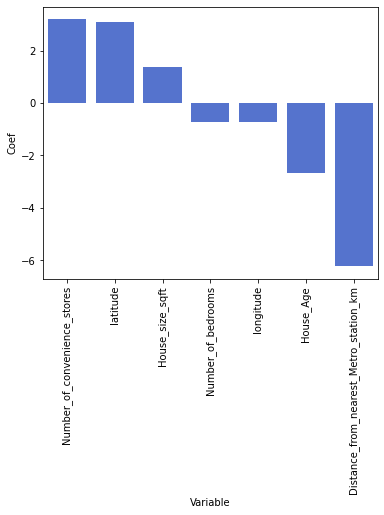

In [41]:
plt.figure(figsize=(6,5))
sns.barplot(x='Variable',y='Coef',data=LR_coeff.iloc[:-1,:],\
           order=LR_coeff.iloc[:-1,:].sort_values('Coef',ascending=False).Variable,color='royalblue')
plt.xticks(rotation=90)
plt.show()

In [42]:
scores=performance_metrics(X_train_scaled,X_test_scaled,LR)
linear_models['LinearRegression_Base']=np.round(scores,3)
linear_models

,LinearRegression_Base
R2_Train,0.577
R2_Test,0.537
AdjR2_Train,0.566
AdjR2_Test,0.509
RMSE_Train,9.000
RMSE_Test,8.800
MAPE_Train,0.180
MAPE_Test,0.220


In [43]:
## Statsmodels

In [44]:
#### For OLS Model ######
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

In [45]:
# Statsmodels ols 
from statsmodels.formula.api import ols
# Stats
import scipy.stats as stats
import statsmodels.stats as smstats

In [46]:
formula_1='House_price_of_unit_area ~ House_Age+Distance_from_nearest_Metro_station_km+Number_of_convenience_stores+latitude+longitude+Number_of_bedrooms+House_size_sqft'

In [47]:
ols_m1 = ols(formula= formula_1, data = data_train).fit()
ols_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     House_price_of_unit_area   R-squared:                       0.577
Model:                                  OLS   Adj. R-squared:                  0.566
Method:                       Least Squares   F-statistic:                     54.74
Date:                      Fri, 09 Dec 2022   Prob (F-statistic):           6.08e-49
Time:                              22:37:36   Log-Likelihood:                -1045.1
No. Observations:                       289   AIC:                             2106.
Df Residuals:                           281   BIC:                             2136.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               -232.1548   7880.161     -0.029      0.977   -1.57e+04    1.53e+04
House_Age                                 -0.2334      0.048     -4.896      0.000      -0.327      -0.140
Distance_from_nearest_Metro_station_km    -0.0050      0.001     -5.523      0.000      -0.007      -0.003
Number_of_convenience_stores               1.0691      0.231      4.634      0.000       0.615       1.523
latitude                                 246.9823     52.759      4.681      0.000     143.130     350.835
longitude                                -48.4926     62.893     -0.771      0.441    -172.294      75.309
Number_of_bedrooms                        -0.8646      1.014     -0.853      0.395      -2.861       1.132
House_size_sqft                            0.0039      0.002      1.658      0.098      -0.001       0.009
==============================================================================
Omnibus:                      202.184   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3360.219
Skew:                           2.588   Prob(JB):                         0.00
Kurtosis:                      18.883   Cond. No.                     2.61e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
formula_2='House_price_of_unit_area ~ House_Age+Distance_from_nearest_Metro_station_km+Number_of_convenience_stores+latitude+House_size_sqft'

In [49]:
ols_m2 = ols(formula= formula_2, data = data_train).fit()
ols_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     House_price_of_unit_area   R-squared:                       0.575
Model:                                  OLS   Adj. R-squared:                  0.567
Method:                       Least Squares   F-statistic:                     76.55
Date:                      Fri, 09 Dec 2022   Prob (F-statistic):           1.51e-50
Time:                              22:37:42   Log-Likelihood:                -1045.8
No. Observations:                       289   AIC:                             2104.
Df Residuals:                           283   BIC:                             2126.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                              -6243.3384   1309.579     -4.767      0.000   -8821.090   -3665.587
House_Age                                 -0.2344      0.047     -4.935      0.000      -0.328      -0.141
Distance_from_nearest_Metro_station_km    -0.0044      0.001     -7.367      0.000      -0.006      -0.003
Number_of_convenience_stores               1.0878      0.230      4.734      0.000       0.635       1.540
latitude                                 251.6580     52.446      4.798      0.000     148.423     354.893
House_size_sqft                            0.0024      0.002      1.546      0.123      -0.001       0.005
==============================================================================
Omnibus:                      209.308   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3761.166
Skew:                           2.690   Prob(JB):                         0.00
Kurtosis:                      19.834   Cond. No.                     4.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
formula_3='House_price_of_unit_area ~ House_Age+Distance_from_nearest_Metro_station_km+Number_of_convenience_stores+latitude'

In [51]:
ols_m3 = ols(formula= formula_3, data = data_train).fit()
ols_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     House_price_of_unit_area   R-squared:                       0.571
Model:                                  OLS   Adj. R-squared:                  0.565
Method:                       Least Squares   F-statistic:                     94.63
Date:                      Fri, 09 Dec 2022   Prob (F-statistic):           4.75e-51
Time:                              22:37:48   Log-Likelihood:                -1047.0
No. Observations:                       289   AIC:                             2104.
Df Residuals:                           284   BIC:                             2122.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                              -6344.5647   1311.135     -4.839      0.000   -8925.340   -3763.789
House_Age                                 -0.2402      0.047     -5.062      0.000      -0.334      -0.147
Distance_from_nearest_Metro_station_km    -0.0044      0.001     -7.306      0.000      -0.006      -0.003
Number_of_convenience_stores               1.0968      0.230      4.763      0.000       0.644       1.550
latitude                                 255.8030     52.506      4.872      0.000     152.453     359.153
==============================================================================
Omnibus:                      211.455   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3970.243
Skew:                           2.713   Prob(JB):                         0.00
Kurtosis:                      20.328   Cond. No.                     4.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# MSE, RMSE & R2 Score
ols_train_pred = ols_m3.predict(X_train)
ols_test_pred = ols_m3.predict(X_test)

R2_train = r2_score(y_train, ols_train_pred)
n=X_train.shape[0]
k=8
# print('No of predictors',k)
# print('Mean Square Error for the training data:',round(mean_squared_error(y_train,ols_train_pred),2))
# print('Root Mean Square Error for the training data:',round(mean_squared_error(y_train,ols_train_pred,squared=False),2))
# print('Co-efficient of determinant for the training data:',round(R2_train,3))
adjR2_train = 1- ((1-R2_train)*(n-1))/(n-k-1)

# print('AdjR2 for training data',round(adjR2_train,3))
# print('\n')
R2_test = r2_score(y_train, ols_train_pred)
n=X_test.shape[0]
# k=X_test.shape[1]
# print('No of predictors',p)
# print('Mean Square Error for the test data:',round(mean_squared_error(y_test,ols_test_pred),2))
# print('Root Mean Square Error for the test data:',round(mean_squared_error(y_test,ols_test_pred,squared=False),2))
# print('Co-efficient of determinant for the test data:',round(R2_test,3))
adjR2_test = 1- ((1-R2_test)*(n-1))/(n-k-1)
print('AdjR2 for test data',round(adjR2_test,3))

linear_models['OLS_Model']=[round(R2_train,3),round(R2_test,3),round(adjR2_train,3),round(adjR2_test,3),\
                            round(mean_squared_error(y_train,ols_train_pred,squared=False),2),\
                            round(mean_squared_error(y_test,ols_test_pred,squared=False),2),
                           round(mean_absolute_percentage_error(y_train,ols_train_pred),2),
                           round(mean_absolute_percentage_error(y_test,ols_test_pred),2)]

AdjR2 for test data 0.542


In [53]:
linear_models

,LinearRegression_Base,OLS_Model
R2_Train,0.577,0.571
R2_Test,0.537,0.571
AdjR2_Train,0.566,0.559
AdjR2_Test,0.509,0.542
RMSE_Train,9.000,9.060
RMSE_Test,8.800,8.560
MAPE_Train,0.180,0.180
MAPE_Test,0.220,0.220


In [54]:
# Log transformed dependent variable - with outliers
X_log = data.drop(['Transaction_date','House_price_of_unit_area'],axis=1)
X_log['metrodist_log']= np.log(data['Distance_from_nearest_Metro_station_km'])
X_log.drop('Distance_from_nearest_Metro_station_km',axis=1,inplace=True)

Variable metrodist_log: Skewness =  0.05 , Kurtosis = -0.51


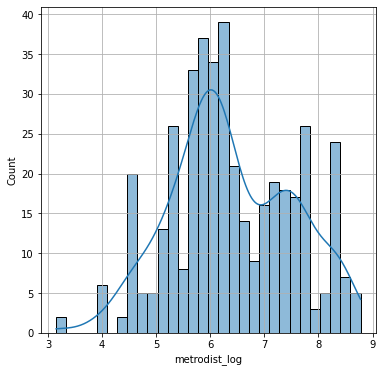

In [57]:
print('Variable metrodist_log: Skewness = ',round(X_log['metrodist_log'].skew(),2),', Kurtosis =',round(X_log['metrodist_log'].kurtosis(),2))
plt.figure(figsize=(6,6))

sns.histplot(x=X_log['metrodist_log'], kde=True,bins=30)
plt.grid()
plt.show()

In [58]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X_log,y,random_state=42,test_size=0.30)

In [59]:
# Scaling 
sc=StandardScaler()
X1_train_scaled=pd.DataFrame(sc.fit_transform(X1_train),columns=X1_train.columns)
X1_test_scaled=pd.DataFrame(sc.transform(X1_test),columns=X1_test.columns)

In [60]:
## With outliers & Log transformed
LR_log = LinearRegression().fit(X1_train_scaled,y1_train)
# LR_Scaled = LinearRegression().fit(X_train_scaled,y_train)
## Coeffiecients and Intercept
LRL_coeff = pd.DataFrame()
LRL_coeff['Variable']=X1_train_scaled.columns
LRL_coeff['Coef']=np.round(LR_log.coef_,2)
LRL_coeff.loc[len(LRL_coeff.index)]=['Intercept',np.round(LR_log.intercept_,2)]
# LRL_coeff.sort_values(by='Coef')

In [61]:
LRL_coeff

,Variable,Coef
0,House_Age,-2.37
1,Number_of_convenience_stores,1.00
2,latitude,3.88
3,longitude,-0.14
4,Number_of_bedrooms,-0.32
5,House_size_sqft,0.66
6,metrodist_log,-7.76
7,Intercept,38.44


In [62]:
scores=performance_metrics(X1_train_scaled,X1_test_scaled,LR_log)
linear_models['LinearRegression_Log']=np.round(scores,3)
linear_models

,LinearRegression_Base,OLS_Model,LinearRegression_Log
R2_Train,0.577,0.571,0.643
R2_Test,0.537,0.571,0.598
AdjR2_Train,0.566,0.559,0.634
AdjR2_Test,0.509,0.542,0.574
RMSE_Train,9.000,9.060,8.270
RMSE_Test,8.800,8.560,8.200
MAPE_Train,0.180,0.180,0.140
MAPE_Test,0.220,0.220,0.180


In [64]:
from sklearn.model_selection import GridSearchCV
 
ridge=Ridge(random_state=42)
parameters={'alpha':[0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,2.5,5,10,20,30,35,40,45,50,55,100]} 

grid_r=GridSearchCV(ridge,parameters,scoring='neg_root_mean_squared_error',cv=10)
grid_r.fit(X1_train_scaled,y_train)

print(grid_r.best_params_)
print(grid_r.best_score_)

{'alpha': 20}
-8.17791314212646


In [65]:
ridge_cv = grid_r.best_estimator_
ridge_cv.fit(X1_train_scaled,y_train)
## Coeffiecients and Intercept
ridge_coef = pd.DataFrame()
ridge_coef['Variable']=X1_train_scaled.columns
ridge_coef['Coef']=np.round(ridge_cv.coef_,2)
ridge_coef.loc[len(ridge_coef.index)]=['Intercept',np.round(ridge_cv.intercept_,2)]
# ridge_coef.sort_values(by='Coef')

In [66]:
ridge_coef

,Variable,Coef
0,House_Age,-2.25
1,Number_of_convenience_stores,1.46
2,latitude,3.66
3,longitude,0.42
4,Number_of_bedrooms,-0.22
5,House_size_sqft,0.61
6,metrodist_log,-6.70
7,Intercept,38.44


In [67]:
scores = performance_metrics(X1_train_scaled,X1_test_scaled,ridge_cv)
linear_models['RidgeRegression']=np.round(scores,3)
linear_models

,LinearRegression_Base,OLS_Model,LinearRegression_Log,RidgeRegression
R2_Train,0.577,0.571,0.643,0.640
R2_Test,0.537,0.571,0.598,0.610
AdjR2_Train,0.566,0.559,0.634,0.631
AdjR2_Test,0.509,0.542,0.574,0.586
RMSE_Train,9.000,9.060,8.270,8.300
RMSE_Test,8.800,8.560,8.200,8.080
MAPE_Train,0.180,0.180,0.140,0.150
MAPE_Test,0.220,0.220,0.180,0.180


In [68]:
lasso=Lasso(random_state=42)
parameters={'alpha':[0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,2.5,5,6,7,8,9,10,15,20,25,30,40,50,55,100]} 
# parameters={'alpha':[0.01,0.02,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,2.5,5,10,20,30,35,40,45,50,55,100]} 
grid=GridSearchCV(lasso,parameters,scoring='neg_root_mean_squared_error',cv=10)
grid.fit(X1_train_scaled,y_train)

print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.2}
-8.1394748372097


In [69]:
lasso_cv = grid.best_estimator_
lasso_cv.fit(X1_train_scaled,y_train)
## Coeffiecients and Intercept
lasso_coef = pd.DataFrame()
lasso_coef['Variable']=X1_train_scaled.columns
lasso_coef['Coef']=np.round(lasso_cv.coef_,2)
lasso_coef.loc[len(lasso_coef.index)]=['Intercept',np.round(lasso_cv.intercept_,2)]
# lasso_coef.sort_values(by='Coef')

In [70]:
lasso_coef

,Variable,Coef
0,House_Age,-2.18
1,Number_of_convenience_stores,0.89
2,latitude,3.72
3,longitude,0.00
4,Number_of_bedrooms,0.00
5,House_size_sqft,0.25
6,metrodist_log,-7.62
7,Intercept,38.44


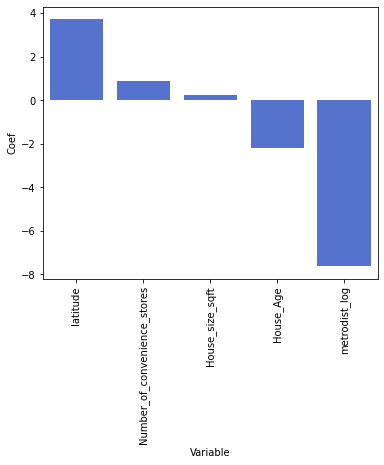

In [71]:
feat=lasso_coef[lasso_coef.Coef!=0]
# feat
plt.figure(figsize=(6,5))
sns.barplot(x='Variable',y='Coef',data=feat.iloc[:-1,:],\
           order=feat.iloc[:-1,:].sort_values('Coef',ascending=False).Variable,color='royalblue')
plt.xticks(rotation=90)
plt.show()

In [72]:
scores = performance_metrics(X1_train_scaled,X1_test_scaled,lasso_cv)
linear_models['LassoRegression']=np.round(scores,3)
linear_models

,LinearRegression_Base,OLS_Model,LinearRegression_Log,RidgeRegression,LassoRegression
R2_Train,0.577,0.571,0.643,0.640,0.642
R2_Test,0.537,0.571,0.598,0.610,0.603
AdjR2_Train,0.566,0.559,0.634,0.631,0.633
AdjR2_Test,0.509,0.542,0.574,0.586,0.580
RMSE_Train,9.000,9.060,8.270,8.300,8.280
RMSE_Test,8.800,8.560,8.200,8.080,8.140
MAPE_Train,0.180,0.180,0.140,0.150,0.140
MAPE_Test,0.220,0.220,0.180,0.180,0.180


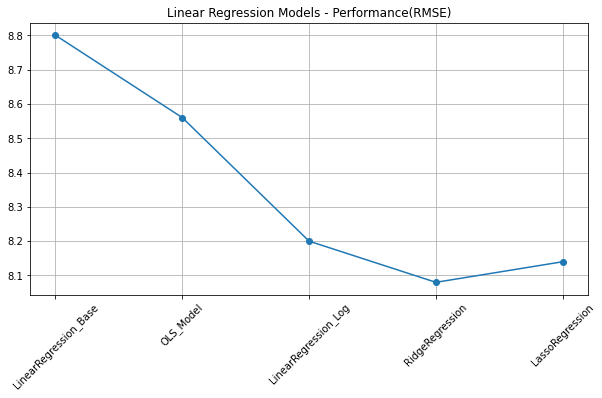

In [73]:
plt.figure(figsize=(10,5))
# plt.plot(linear_models.T.index,linear_models.T.RMSE_Train,marker='*',label='Train')
plt.plot(linear_models.T.index, \
         linear_models.T.RMSE_Test,marker='o')
plt.xticks(rotation=45)
plt.grid()
plt.title('Linear Regression Models - Performance(RMSE)')
plt.show()

- Ridge regression gives a better performance in terms of test RMSE with an accuracy 0f 61%

In [74]:
from sklearn.tree import plot_tree, export_graphviz,DecisionTreeRegressor
from dtreeviz.trees import *

In [75]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [76]:
scores=performance_metrics(X_train,X_test,dtr)
model_performance['DecisionTree_Base']=np.round(scores,3)
model_performance

,DecisionTree_Base
R2_Train,1.000
R2_Test,0.459
AdjR2_Train,1.000
AdjR2_Test,0.426
RMSE_Train,0.000
RMSE_Test,9.520
MAPE_Train,0.000
MAPE_Test,0.220


In [77]:
# param_grid = {
#     'max_depth': [7],
#     'min_samples_leaf': [10,15,20],
#     'min_samples_split': [30,45,60]
# }#{'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 45}
# 71.6, 66.75 71 64.76 7.35 7.46 0.13 0.18

# param_grid = {
#     'max_depth': [5,6,7],
#     'min_samples_leaf': [10,15,20],
#     'min_samples_split': [30,45,60]
# }#{'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 45}
# 71.6, 66.75 71 64.76 7.35 7.46 0.13 0.18

# param_grid = {
#     'max_depth': [4,5,6],
#     'min_samples_leaf': [5,10,15],
#     'min_samples_split': [30,45,60]
# }#{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 30}
# 77.3, 65.69 76.77 63.64 6.59 7.57 0.12 0.18

param_grid = {
    'max_depth': [4,5],
    'min_samples_leaf': [10,15,20],
    'min_samples_split': [30,45,60]
}#{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 45}
# 0.7156 0.6675 0.7085 0.6476 7.38, 7.46, 0.13, 0.18

dtr_reg=DecisionTreeRegressor(random_state=42)
grid_dt = GridSearchCV(estimator = dtr_reg, param_grid = param_grid, cv = 5)
grid_dt.fit(X_train,y_train)
print(grid_dt.best_params_)

{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 45}


In [78]:
dtr_reg = grid_dt.best_estimator_
dtr_reg.fit(X_train,y_train)
scores=performance_metrics(X_train,X_test,dtr_reg)
model_performance['DecisionTree_Tuned']=np.round(scores,3)
model_performance

,DecisionTree_Base,DecisionTree_Tuned
R2_Train,1.000,0.716
R2_Test,0.459,0.668
AdjR2_Train,1.000,0.709
AdjR2_Test,0.426,0.648
RMSE_Train,0.000,7.380
RMSE_Test,9.520,7.460
MAPE_Train,0.000,0.130
MAPE_Test,0.220,0.180


In [79]:
feat_imp= pd.DataFrame({'Variables': X_train.columns,
              'Imp': np.round(dtr_reg.feature_importances_*100,3)}).sort_values('Imp',ascending=False).reset_index(drop=True)
feat_imp

,Variables,Imp
0,Distance_from_nearest_Metro_station_km,73.154
1,latitude,14.005
2,House_Age,12.841
3,Number_of_convenience_stores,0.000
4,longitude,0.000
5,Number_of_bedrooms,0.000
6,House_size_sqft,0.000


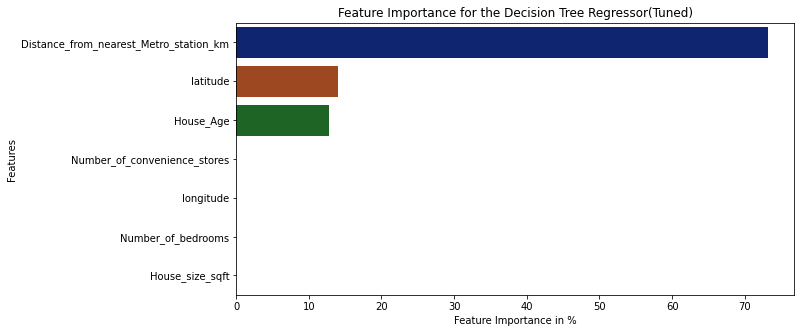

In [80]:
plt.figure(figsize=(10,5))
sns.barplot(x=feat_imp['Imp'],y=feat_imp.Variables,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance for the Decision Tree Regressor(Tuned)')
plt.show()

In [82]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [83]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [84]:
scores=performance_metrics(X_train,X_test,rfr)
model_performance['RFR_Base']=np.round(scores,3)
model_performance

,DecisionTree_Base,DecisionTree_Tuned,RFR_Base
R2_Train,1.000,0.716,0.943
R2_Test,0.459,0.668,0.721
AdjR2_Train,1.000,0.709,0.942
AdjR2_Test,0.426,0.648,0.704
RMSE_Train,0.000,7.380,3.300
RMSE_Test,9.520,7.460,6.830
MAPE_Train,0.000,0.130,0.050
MAPE_Test,0.220,0.180,0.160


In [85]:
# param_grid = {
#     'max_depth': [4,5],
#     'max_features': [0.5,0.7,0.8,0.9],
#     'n_estimators': [50,75,100],
#     'min_samples_leaf': [10,15,20],
#     'min_samples_split': [30,45,60]
# }#{'max_depth': 4, 'max_features': 0.8, 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 50}
# # 0.7216 0.707 0.7147 0.6901 7.3, 6.99, 0.13, 0.17

param_grid = {
    'max_depth': [4],
    'max_features': [0.8,0.9,1],
    'n_estimators': [50],
    'min_samples_leaf': [10,15,20],
    'min_samples_split': [30,45,60]
}#{'max_depth': 4, 'max_features': 0.8, 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 50}
# # 0.7216 0.707 0.7147 0.6901 7.3, 6.99, 0.13, 0.17

grid_rf = GridSearchCV(estimator = RandomForestRegressor(random_state=42), param_grid = param_grid, cv = 5)
grid_rf.fit(X_train,y_train)
print(grid_rf.best_params_)

{'max_depth': 4, 'max_features': 0.8, 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 50}


In [86]:
rfr_tuned = grid_rf.best_estimator_
rfr_tuned.fit(X_train,y_train)
scores=performance_metrics(X_train,X_test,rfr_tuned)
model_performance['RFR_Tuned']=np.round(scores,3)
model_performance

,DecisionTree_Base,DecisionTree_Tuned,RFR_Base,RFR_Tuned
R2_Train,1.000,0.716,0.943,0.722
R2_Test,0.459,0.668,0.721,0.708
AdjR2_Train,1.000,0.709,0.942,0.715
AdjR2_Test,0.426,0.648,0.704,0.690
RMSE_Train,0.000,7.380,3.300,7.300
RMSE_Test,9.520,7.460,6.830,6.990
MAPE_Train,0.000,0.130,0.050,0.130
MAPE_Test,0.220,0.180,0.160,0.170


In [87]:
## Feature importance
feat_imp = pd.DataFrame({'Variables': X_train.columns,'Imp': np.round(rfr_tuned.feature_importances_*100,3)})\
            .sort_values('Imp',ascending=False).reset_index(drop=True)

feat_imp

,Variables,Imp
0,Distance_from_nearest_Metro_station_km,61.446
1,latitude,19.679
2,House_Age,7.647
3,Number_of_convenience_stores,6.762
4,longitude,3.706
5,House_size_sqft,0.691
6,Number_of_bedrooms,0.070


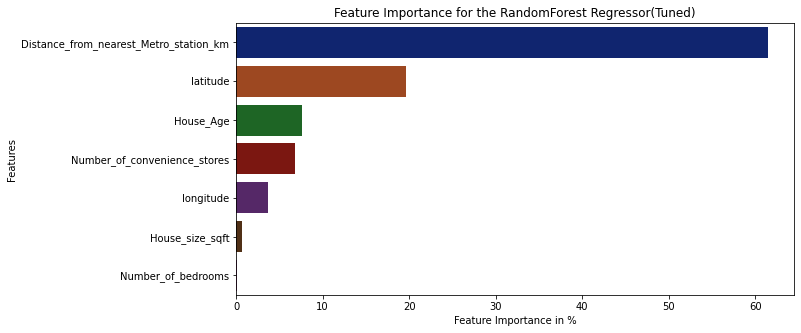

In [88]:
plt.figure(figsize=(10,5))
sns.barplot(x=feat_imp['Imp'],y=feat_imp.Variables,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance for the RandomForest Regressor(Tuned)')
plt.show()

In [89]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [90]:
scores=performance_metrics(X_train,X_test,gbr)
model_performance['GradientBoosting_Base']=np.round(scores,3)
model_performance

,DecisionTree_Base,DecisionTree_Tuned,RFR_Base,RFR_Tuned,GradientBoosting_Base
R2_Train,1.000,0.716,0.943,0.722,0.939
R2_Test,0.459,0.668,0.721,0.708,0.728
AdjR2_Train,1.000,0.709,0.942,0.715,0.938
AdjR2_Test,0.426,0.648,0.704,0.690,0.712
RMSE_Train,0.000,7.380,3.300,7.300,3.410
RMSE_Test,9.520,7.460,6.830,6.990,6.740
MAPE_Train,0.000,0.130,0.050,0.130,0.070
MAPE_Test,0.220,0.180,0.160,0.170,0.160


In [91]:
# Basic model 
mse_train = (np.mean(cross_val_score(gbr, X_train, y_train, cv=5,scoring='neg_mean_squared_error'))) * -1
mse_test = (np.mean(cross_val_score(gbr, X_test, y_test, cv=5,scoring='neg_mean_squared_error'))) * -1
print('Train Data: After cross validations, RMSE:',np.sqrt(mse_train))
print('Test Data: After cross validations, RMSE:',np.sqrt(mse_test))

Train Data: After cross validations, RMSE: 8.17906538659184
Test Data: After cross validations, RMSE: 8.07933403539217


In [92]:
# param_grid={'subsample':[0.8,0.85,0.9],
#             'max_features':[0.7,0.8,0.9],
#             'min_samples_leaf': [10,15],
#             'min_samples_split': [20,30,45],
#             'n_estimators':[45,50,60],
#             'learning_rate':[.001,0.01,.1],
#             'max_depth':[4,5]
# }#{'learning_rate': 0.1, 'max_depth': 5, 'max_features': 0.9, 
# # 'min_samples_leaf': 10, 'min_samples_split': 45, 'n_estimators': 45, 'subsample': 0.85}
# Overfit

param_grid={'subsample':[0.85],
            'max_features':[0.8],
            'min_samples_leaf': [10,15],
            'min_samples_split': [30,45,50],
            'n_estimators':[45],
            'learning_rate':[0.05],
#             'max_depth':[4,5,6]
}#{'learning_rate': 0.05, 'max_features': 0.8, 'min_samples_leaf': 10, 
# 'min_samples_split': 50, 'n_estimators': 45, 'subsample': 0.85}
# 0.7456 0.7175 0.7393 0.7006 6.98 6.87 0.13 0.17
gbr_tuned=GradientBoostingRegressor(random_state=42)

# param_grid={'alpha':[0.7,0.8,0.9]}
grid_gbr = GridSearchCV(gbr_tuned,param_grid,n_jobs=1,scoring='neg_mean_squared_error',cv=5)
grid_gbr.fit(X_train,y_train)
print(grid_gbr.best_params_)

{'learning_rate': 0.05, 'max_features': 0.8, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 45, 'subsample': 0.85}


In [93]:
# gbr_tuned = GradientBoostingRegressor(random_state=42,learning_rate=0.05,n_estimators=45,subsample=0.7)
gbr_tuned = grid_gbr.best_estimator_
gbr_tuned.fit(X_train,y_train)
scores=performance_metrics(X_train,X_test,gbr_tuned)
model_performance['GradientBoosting_Tuned']=np.round(scores,3)
model_performance
# scores

,DecisionTree_Base,DecisionTree_Tuned,RFR_Base,RFR_Tuned,GradientBoosting_Base,GradientBoosting_Tuned
R2_Train,1.000,0.716,0.943,0.722,0.939,0.746
R2_Test,0.459,0.668,0.721,0.708,0.728,0.718
AdjR2_Train,1.000,0.709,0.942,0.715,0.938,0.739
AdjR2_Test,0.426,0.648,0.704,0.690,0.712,0.701
RMSE_Train,0.000,7.380,3.300,7.300,3.410,6.980
RMSE_Test,9.520,7.460,6.830,6.990,6.740,6.870
MAPE_Train,0.000,0.130,0.050,0.130,0.070,0.130
MAPE_Test,0.220,0.180,0.160,0.170,0.160,0.170


In [94]:
## Feature importance
feat_imp = pd.DataFrame({'Variables': X_train.columns,'Imp': np.round(gbr_tuned.feature_importances_*100,3)})\
            .sort_values('Imp',ascending=False).reset_index(drop=True).reset_index(drop=True)

feat_imp

,Variables,Imp
0,Distance_from_nearest_Metro_station_km,59.418
1,latitude,21.359
2,House_Age,10.393
3,longitude,6.639
4,Number_of_convenience_stores,1.231
5,House_size_sqft,0.960
6,Number_of_bedrooms,0.000


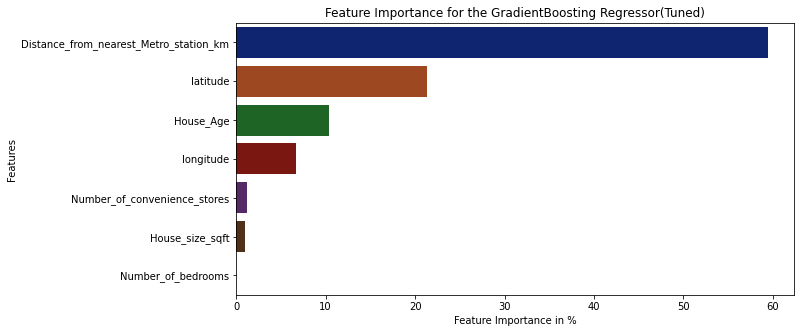

In [95]:
plt.figure(figsize=(10,5))
sns.barplot(x=feat_imp['Imp'],y=feat_imp.Variables,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance for the GradientBoosting Regressor(Tuned)')
plt.show()

In [96]:
from xgboost import XGBRegressor

In [97]:
xgbr = XGBRegressor(random_state=42)
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [98]:
scores=performance_metrics(X_train,X_test,xgbr)
model_performance['XGBoosting_Base']=np.round(scores,3)
model_performance

,DecisionTree_Base,DecisionTree_Tuned,RFR_Base,RFR_Tuned,GradientBoosting_Base,GradientBoosting_Tuned,XGBoosting_Base
R2_Train,1.000,0.716,0.943,0.722,0.939,0.746,1.000
R2_Test,0.459,0.668,0.721,0.708,0.728,0.718,0.703
AdjR2_Train,1.000,0.709,0.942,0.715,0.938,0.739,1.000
AdjR2_Test,0.426,0.648,0.704,0.690,0.712,0.701,0.685
RMSE_Train,0.000,7.380,3.300,7.300,3.410,6.980,0.050
RMSE_Test,9.520,7.460,6.830,6.990,6.740,6.870,7.050
MAPE_Train,0.000,0.130,0.050,0.130,0.070,0.130,0.000
MAPE_Test,0.220,0.180,0.160,0.170,0.160,0.170,0.160


In [99]:
xgb_tuned = XGBRegressor(random_state=42,n_jobs=-1)

# params = { 'max_depth': [3,6,10],
#           'subsample':[0.8,0.9,1],
#            'learning_rate': [0.01, 0.05, 0.1],
#            'n_estimators': [90,120, 150],
#            'colsample_bytree': [0.7,0.8]}
# Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 120, 'subsample': 1}
# 0.957 0.956 2970.54  2993.69

params = { 'max_depth':[3],
           'learning_rate': [0.05],
           'n_estimators': [60],
           'colsample_bytree': [0.95],
         'colsample_bylevel': [0.95],
          'colsample_bynode': [0.95],
         'subsample':[0.85]}

grid_xgb = GridSearchCV(estimator=xgb_tuned, 
                   param_grid=params,
#                    scoring='neg_mean_squared_error', 
                   verbose=1,cv=5)
grid_xgb.fit(X_train, y_train)
print("Best parameters:", grid_xgb.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'colsample_bylevel': 0.95, 'colsample_bynode': 0.95, 'colsample_bytree': 0.95, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 60, 'subsample': 0.85}


In [100]:
xgb_tuned=grid_xgb.best_estimator_
# xgb_tuned =XGBRegressor(random_state=42,   
#                         colsample_bylevel= 0.95,
#                         colsample_bytree= 0.95, 
#                         colsample_bynode=0.95,
#                         learning_rate= 0.05, 
#                         n_estimators= 60, 
#                         subsample= 0.85,
# #                         gamma=0.05,
#                        max_depth=3)
xgb_tuned.fit(X_train,y_train)
scores=performance_metrics(X_train,X_test,xgb_tuned)
model_performance['XGBoosting_Tuned']=np.round(scores,3)
model_performance
# scores

,DecisionTree_Base,DecisionTree_Tuned,RFR_Base,RFR_Tuned,GradientBoosting_Base,GradientBoosting_Tuned,XGBoosting_Base,XGBoosting_Tuned
R2_Train,1.000,0.716,0.943,0.722,0.939,0.746,1.000,0.796
R2_Test,0.459,0.668,0.721,0.708,0.728,0.718,0.703,0.720
AdjR2_Train,1.000,0.709,0.942,0.715,0.938,0.739,1.000,0.791
AdjR2_Test,0.426,0.648,0.704,0.690,0.712,0.701,0.685,0.704
RMSE_Train,0.000,7.380,3.300,7.300,3.410,6.980,0.050,6.240
RMSE_Test,9.520,7.460,6.830,6.990,6.740,6.870,7.050,6.840
MAPE_Train,0.000,0.130,0.050,0.130,0.070,0.130,0.000,0.110
MAPE_Test,0.220,0.180,0.160,0.170,0.160,0.170,0.160,0.160


In [101]:
## Feature importance
feat_imp = pd.DataFrame({'Variables': X_train.columns,'Imp': np.round(xgb_tuned.feature_importances_*100,3)})\
            .sort_values('Imp',ascending=False).reset_index(drop=True).head(10).reset_index(drop=True).head(10)

feat_imp

,Variables,Imp
0,Distance_from_nearest_Metro_station_km,40.646000
1,latitude,22.924999
2,longitude,11.335000
3,House_Age,9.068000
4,Number_of_convenience_stores,8.624000
5,House_size_sqft,5.369000
6,Number_of_bedrooms,2.033000


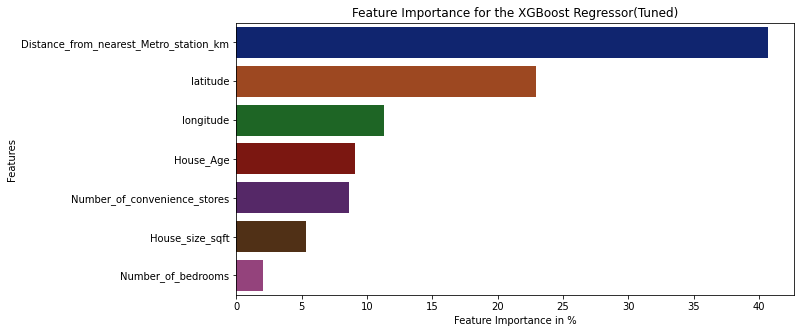

In [102]:
plt.figure(figsize=(10,5))
sns.barplot(x=feat_imp['Imp'],y=feat_imp.Variables,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance for the XGBoost Regressor(Tuned)')
plt.show()

In [103]:
model_performance

,DecisionTree_Base,DecisionTree_Tuned,RFR_Base,RFR_Tuned,GradientBoosting_Base,GradientBoosting_Tuned,XGBoosting_Base,XGBoosting_Tuned
R2_Train,1.000,0.716,0.943,0.722,0.939,0.746,1.000,0.796
R2_Test,0.459,0.668,0.721,0.708,0.728,0.718,0.703,0.720
AdjR2_Train,1.000,0.709,0.942,0.715,0.938,0.739,1.000,0.791
AdjR2_Test,0.426,0.648,0.704,0.690,0.712,0.701,0.685,0.704
RMSE_Train,0.000,7.380,3.300,7.300,3.410,6.980,0.050,6.240
RMSE_Test,9.520,7.460,6.830,6.990,6.740,6.870,7.050,6.840
MAPE_Train,0.000,0.130,0.050,0.130,0.070,0.130,0.000,0.110
MAPE_Test,0.220,0.180,0.160,0.170,0.160,0.170,0.160,0.160


In [104]:
linear_models

,LinearRegression_Base,OLS_Model,LinearRegression_Log,RidgeRegression,LassoRegression
R2_Train,0.577,0.571,0.643,0.640,0.642
R2_Test,0.537,0.571,0.598,0.610,0.603
AdjR2_Train,0.566,0.559,0.634,0.631,0.633
AdjR2_Test,0.509,0.542,0.574,0.586,0.580
RMSE_Train,9.000,9.060,8.270,8.300,8.280
RMSE_Test,8.800,8.560,8.200,8.080,8.140
MAPE_Train,0.180,0.180,0.140,0.150,0.140
MAPE_Test,0.220,0.220,0.180,0.180,0.180


In [105]:
model_performance['Lasso']=linear_models['LassoRegression']

In [106]:
model_performance

,DecisionTree_Base,DecisionTree_Tuned,RFR_Base,RFR_Tuned,GradientBoosting_Base,GradientBoosting_Tuned,XGBoosting_Base,XGBoosting_Tuned,Lasso
R2_Train,1.000,0.716,0.943,0.722,0.939,0.746,1.000,0.796,0.642
R2_Test,0.459,0.668,0.721,0.708,0.728,0.718,0.703,0.720,0.603
AdjR2_Train,1.000,0.709,0.942,0.715,0.938,0.739,1.000,0.791,0.633
AdjR2_Test,0.426,0.648,0.704,0.690,0.712,0.701,0.685,0.704,0.580
RMSE_Train,0.000,7.380,3.300,7.300,3.410,6.980,0.050,6.240,8.280
RMSE_Test,9.520,7.460,6.830,6.990,6.740,6.870,7.050,6.840,8.140
MAPE_Train,0.000,0.130,0.050,0.130,0.070,0.130,0.000,0.110,0.140
MAPE_Test,0.220,0.180,0.160,0.170,0.160,0.170,0.160,0.160,0.180


In [107]:
model_performance=model_performance.T

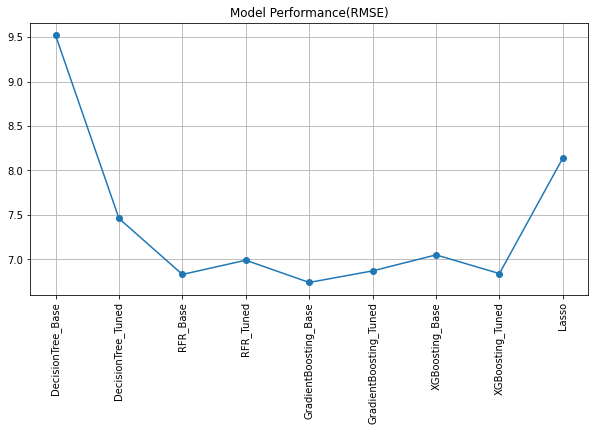

In [108]:
plt.figure(figsize=(10,5))
# plt.plot(model_performance.index, model_performance.RMSE_Train,marker='*')
plt.plot(model_performance.index, model_performance.RMSE_Test,marker='o')
plt.xticks(rotation=90)
plt.grid()
plt.title('Model Performance(RMSE)')
plt.show()

- Tuned Gradient Boost model performs well as 70.1% of the variation in house price value is explained by the predictor variables of the model.
- RMSE value is 6.87 
- Average difference between actual & estimated prices is 17%
- Train & Test performance metrics are closer 